# Scraping Met Musem
Mariam Barakat

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

### Combine all the json

In [90]:
import os
import json

# Specify the directory where your JSON files are located
json_files_directory = 'data'

# Specify the name of the output combined JSON file
output_json_file = 'combined_met.json'

# Function to normalize text
def normalize_text(text):
    try:
        # Attempt to replace en dashes with hyphens
        normalized_text = text.replace('–', '-')
    except Exception as e:
        print(f"An error occurred while normalizing text: {e}")
        normalized_text = text  # If an error occurs, keep the original text
    return normalized_text

# Initialize an empty list to store the combined and normalized data
combined_normalized_data = []

# Iterate over each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)
        
        # Load the data from the current JSON file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            # Normalize all text fields
            for key, value in data.items():
                if isinstance(value, str):
                    data[key] = normalize_text(value)

            # Add a "Path" key with the file name to each dictionary
            data['Path'] = filename
            
            # Append the data from the current file to the combined_normalized_data list
            combined_normalized_data.append(data)

# Write the combined and normalized data to the output JSON file
with open(output_json_file, 'w', encoding='utf-8') as output_file:
    json.dump(combined_normalized_data, output_file, indent=2, ensure_ascii=False)

print(f'Combined and normalized data with "Path" key written to {output_json_file}')


Combined and normalized data with "Path" key written to combined_met.json


### Normalize the json file

In [91]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [92]:
# Load your JSON file
input_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Convert the set of keys to a list if needed
all_keys_list = list(all_keys)

# Print or use the list of keys
print("All keys available in the JSON file:")
print(all_keys_list)


All keys available in the JSON file:
['primaryImageSmall', 'artistGender', 'title', 'excavation', 'objectURL', 'artistBeginDate', 'repository', 'objectID', 'locale', 'city', 'additionalImages', 'artistRole', 'Path', 'artistDisplayName', 'dimensions', 'artistPrefix', 'locus', 'subregion', 'culture', 'measurements', 'artistSuffix', 'isTimelineWork', 'reign', 'isHighlight', 'accessionNumber', 'artistNationality', 'period', 'region', 'department', 'county', 'creditLine', 'state', 'river', 'artistWikidata_URL', 'objectBeginDate', 'artistULAN_URL', 'dynasty', 'artistDisplayBio', 'rightsAndReproduction', 'objectEndDate', 'geographyType', 'objectName', 'linkResource', 'isPublicDomain', 'tags', 'accessionYear', 'medium', 'artistAlphaSort', 'portfolio', 'classification', 'GalleryNumber', 'metadataDate', 'objectDate', 'country', 'artistEndDate', 'constituents', 'objectWikidata_URL', 'primaryImage']


In [93]:
print(len(all_keys_list))

58


In [94]:
# Load your JSON file
input_json_file = 'combined_met.json'
output_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Normalize the list of dictionaries
normalized_data = []
for item in data:
    normalized_item = {key: item.get(key, '') for key in all_keys}
    normalized_data.append(normalized_item)

# Write the normalized data to a new JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(normalized_data, output_file, indent=2)

print(f'Normalized data written to {output_json_file}')

Normalized data written to combined_met.json


### Converting to dataframe

In [95]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [96]:
df = pd.DataFrame(data)

In [97]:
df.head()

primaryImageSmall artistGender  \
0  https://images.metmuseum.org/CRDImages/eg/web-...                
1  https://images.metmuseum.org/CRDImages/eg/web-...                
2  https://images.metmuseum.org/CRDImages/eg/web-...                
3  https://images.metmuseum.org/CRDImages/eg/web-...                
4  https://images.metmuseum.org/CRDImages/eg/web-...                

                                               title excavation  \
0                    Bastet holding aegis and basket              
1  Upper half of a woman from a pair or group statue              
2                       Head from a figure of Osiris              
3                                   Figure of Osiris              
4                  Head and chest of a shabti figure              

                                           objectURL artistBeginDate  \
0  https://www.metmuseum.org/art/collection/searc...                   
1  https://www.metmuseum.org/art/collection/searc...                   
2  https://www.metmuseum.org/art/collection/searc...                   
3  https://www.metmuseum.org/art/collection/searc...                   
4  https://www.metmuseum.org/art/collection/searc...                   

                                 repository  objectID locale city  ...  \
0  Metropolitan Museum of Art, New York, NY    329767              ...   
1  Metropolitan Museum of Art, New York, NY    329768              ...   
2  Metropolitan Museum of Art, New York, NY    329769              ...   
3  Metropolitan Museum of Art, New York, NY    329771              ...   
4  Metropolitan Museum of Art, New York, NY    329774              ...   

  portfolio classification GalleryNumber             metadataDate  \
0                                         2021-07-17T04:40:49.67Z   
1                                    106  2023-02-07T04:46:51.34Z   
2                                    130  2023-02-07T04:46:51.34Z   
3                                         2021-07-17T04:40:49.67Z   
4                                    106  2023-02-07T04:46:51.34Z   

           objectDate country artistEndDate constituents  \
0         664-30 B.C.   Egypt                       None   
1  ca. 1850-1650 B.C.   Egypt                       None   
2    ca. 664-525 B.C.   Egypt                       None   
3         664-30 B.C.   Egypt                       None   
4  ca. 1850-1650 B.C.   Egypt                       None   

                         objectWikidata_URL  \
0                                             
1  https://www.wikidata.org/wiki/Q116408028   
2  https://www.wikidata.org/wiki/Q116408043   
3                                             
4  https://www.wikidata.org/wiki/Q116408082   

                                        primaryImage  
0  https://images.metmuseum.org/CRDImages/eg/orig...  
1  https://images.metmuseum.org/CRDImages/eg/orig...  
2  https://images.metmuseum.org/CRDImages/eg/orig...  
3  https://images.metmuseum.org/CRDImages/eg/orig...  
4  https://images.metmuseum.org/CRDImages/eg/orig...  

[5 rows x 58 columns]

#### Explore null

In [98]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

primaryImageSmall          0.000000
artistGender              99.287975
title                      0.013186
excavation                47.409019
objectURL                  0.000000
artistBeginDate           98.602321
repository                 0.000000
objectID                   0.000000
locale                    49.030854
city                      95.365243
additionalImages           0.000000
artistRole                98.206751
Path                       0.000000
artistDisplayName         98.206751
dimensions                12.585707
artistPrefix              99.993407
locus                     68.150053
subregion                 43.829114
culture                  100.000000
measurements               0.000000
artistSuffix              99.775844
isTimelineWork             0.000000
reign                     67.121572
isHighlight                0.000000
accessionNumber            0.000000
artistNationality         99.874736
period                    22.283755
region                    40

#### Drop useless

In [99]:
df.columns

Index(['primaryImageSmall', 'artistGender', 'title', 'excavation', 'objectURL',
       'artistBeginDate', 'repository', 'objectID', 'locale', 'city',
       'additionalImages', 'artistRole', 'Path', 'artistDisplayName',
       'dimensions', 'artistPrefix', 'locus', 'subregion', 'culture',
       'measurements', 'artistSuffix', 'isTimelineWork', 'reign',
       'isHighlight', 'accessionNumber', 'artistNationality', 'period',
       'region', 'department', 'county', 'creditLine', 'state', 'river',
       'artistWikidata_URL', 'objectBeginDate', 'artistULAN_URL', 'dynasty',
       'artistDisplayBio', 'rightsAndReproduction', 'objectEndDate',
       'geographyType', 'objectName', 'linkResource', 'isPublicDomain', 'tags',
       'accessionYear', 'medium', 'artistAlphaSort', 'portfolio',
       'classification', 'GalleryNumber', 'metadataDate', 'objectDate',
       'country', 'artistEndDate', 'constituents', 'objectWikidata_URL',
       'primaryImage'],
      dtype='object')

In [100]:
len(list(df.columns))

58

In [101]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** primaryImageSmall 14792 =============================
primaryImageSmall
https://images.metmuseum.org/CRDImages/eg/web-large/LC-16_7_13a_EGDP031773.jpg    28
https://images.metmuseum.org/CRDImages/eg/web-large/1970.52.7.jpg                 22
https://images.metmuseum.org/CRDImages/eg/web-large/LC-04_18_27_EGDP036229.jpg    13
https://images.metmuseum.org/CRDImages/eg/web-large/Images-Restricted.jpg         12
https://images.metmuseum.org/CRDImages/eg/web-large/20-3-845-856.jpg              12
                                                                                  ..
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.169_view_1.jpg            1
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.170.jpg                   1
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.173.jpg                   1
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.177.jpg                   1
https://images.metmuseum.org/CRDImages/eg/web-large

In [102]:
# Filter rows where any of the specified columns have non-empty string values
# there are items that are artist made so we are removing them
columns_to_check = ['artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality']
df = df[df[columns_to_check].applymap(lambda x: x == '').all(axis=1)]
df = df.drop(columns= ["primaryImageSmall","constituents","tags","geographyType","isHighlight", "locale", "objectURL" , "isTimelineWork", "primaryImage", "objectWikidata_URL", "additionalImages","objectWikidata_URL", 'artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality',"artistAlphaSort", "objectID", "excavation", "measurements", "metadataDate", "accessionYear", "GalleryNumber", "river", "objectEndDate", "artistSuffix", "artistWikidata_URL", "artistRole", "objectBeginDate", "accessionNumber", "dimensions", "linkResource", "artistBeginDate", "artistPrefix", "isPublicDomain", "culture", "state", "artistEndDate", "repository", "creditLine", "artistGender", "rightsAndReproduction", "county", "country", "department", "portfolio" ])

C:\Users\maria\AppData\Local\Temp\ipykernel_20904\1508404282.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df[columns_to_check].applymap(lambda x: x == '').all(axis=1)]


In [103]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** title 6076 =============================
title
Textile Fragment                                          1152
Sealing                                                    578
Worker Shabti of Henettawy (C), Daughter of Isetemkheb     354
Worker Shabti of Nauny                                     266
Scarab                                                     220
                                                          ... 
Cavetto Tile from the palace of Ramesses II                  1
Footed Amphora Inscribed for Amenhotep II                    1
Tile with fish and lotus flowers in a canal                  1
Painted Plaster Pavement Fragment                            1
Unpainted linen fragment                                     1
Name: count, Length: 6076, dtype: int64
************************** city 56 =============================
city
                                      14196
Fustat                                  161
Cairo                              

In [104]:
df.columns

Index(['title', 'city', 'Path', 'locus', 'subregion', 'reign', 'period',
       'region', 'dynasty', 'objectName', 'medium', 'classification',
       'objectDate', 'constituents'],
      dtype='object')

In [105]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

title              0.013426
city              95.300752
Path               0.000000
locus             67.709452
subregion         44.085661
reign             67.984694
period            22.630236
region            41.031149
dynasty           36.318475
objectName         0.174544
medium             0.013426
classification    77.369764
objectDate         0.046992
constituents       0.000000
dtype: float64


### Cleaning Data

In [106]:
df.to_csv("temp.csv")

In [107]:
import pandas as pd
import re

# Define a function to clean the values
def clean_period(value):
    # You can customize this function based on your specific needs
    if pd.isna(value) or value == '' or value == "UNSPECIFIED":
        return 'unknown'
    # Here, we are removing text inside parentheses and question marks
    cleaned_value = re.sub(r'\([^)]*\)|\?', '', value)
    # Strip everything after the first semicolon
    cleaned_value = cleaned_value.split(';', 1)[0]
    cleaned_value = cleaned_value.split('/', 1)[0]
    
    
    return cleaned_value.strip()



In [108]:
def find_unique(col):
    unique_values_count = df[col].value_counts()
    # Convert the result to a DataFrame for better formatting
    result_df = pd.DataFrame({'Unique Values': unique_values_count.index, 'Count': unique_values_count.values})
    result_df = result_df.sort_values(by='Unique Values', ascending=True)
    result_df.to_csv(f"cleaning\{col}.csv")
    # Print the result
    return result_df, len(unique_values_count)

#### clean

In [109]:
for i in list(df.columns):
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)
    # Apply the clean function to the 'period' column
    df[i] = df[i].apply(clean_period)
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)

title 6076
title 5970
city 56


city 53
Path 14896
Path 14896
locus 938
locus 882
subregion 112
subregion 109
reign 274
reign 266
period 223
period 204
region 26
region 25
dynasty 292
dynasty 270
objectName 5576
objectName 5343
medium 1805
medium 1365
classification 26
classification 26
objectDate 1186
objectDate 1158
constituents 0
constituents 1


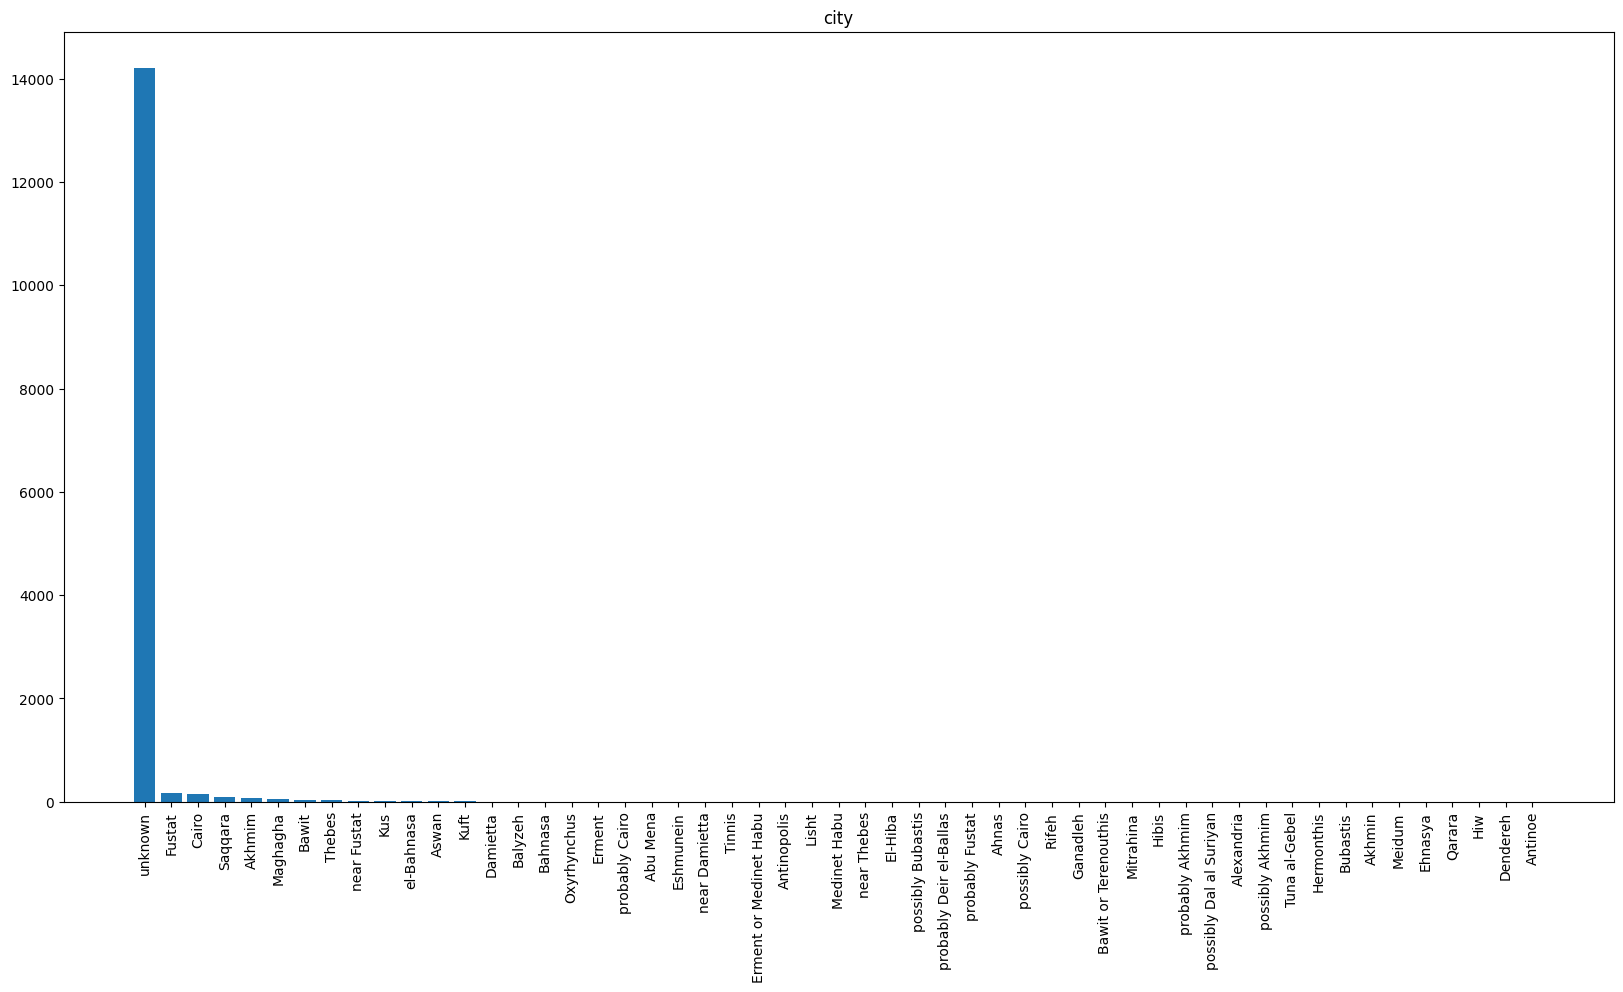

hi subregion


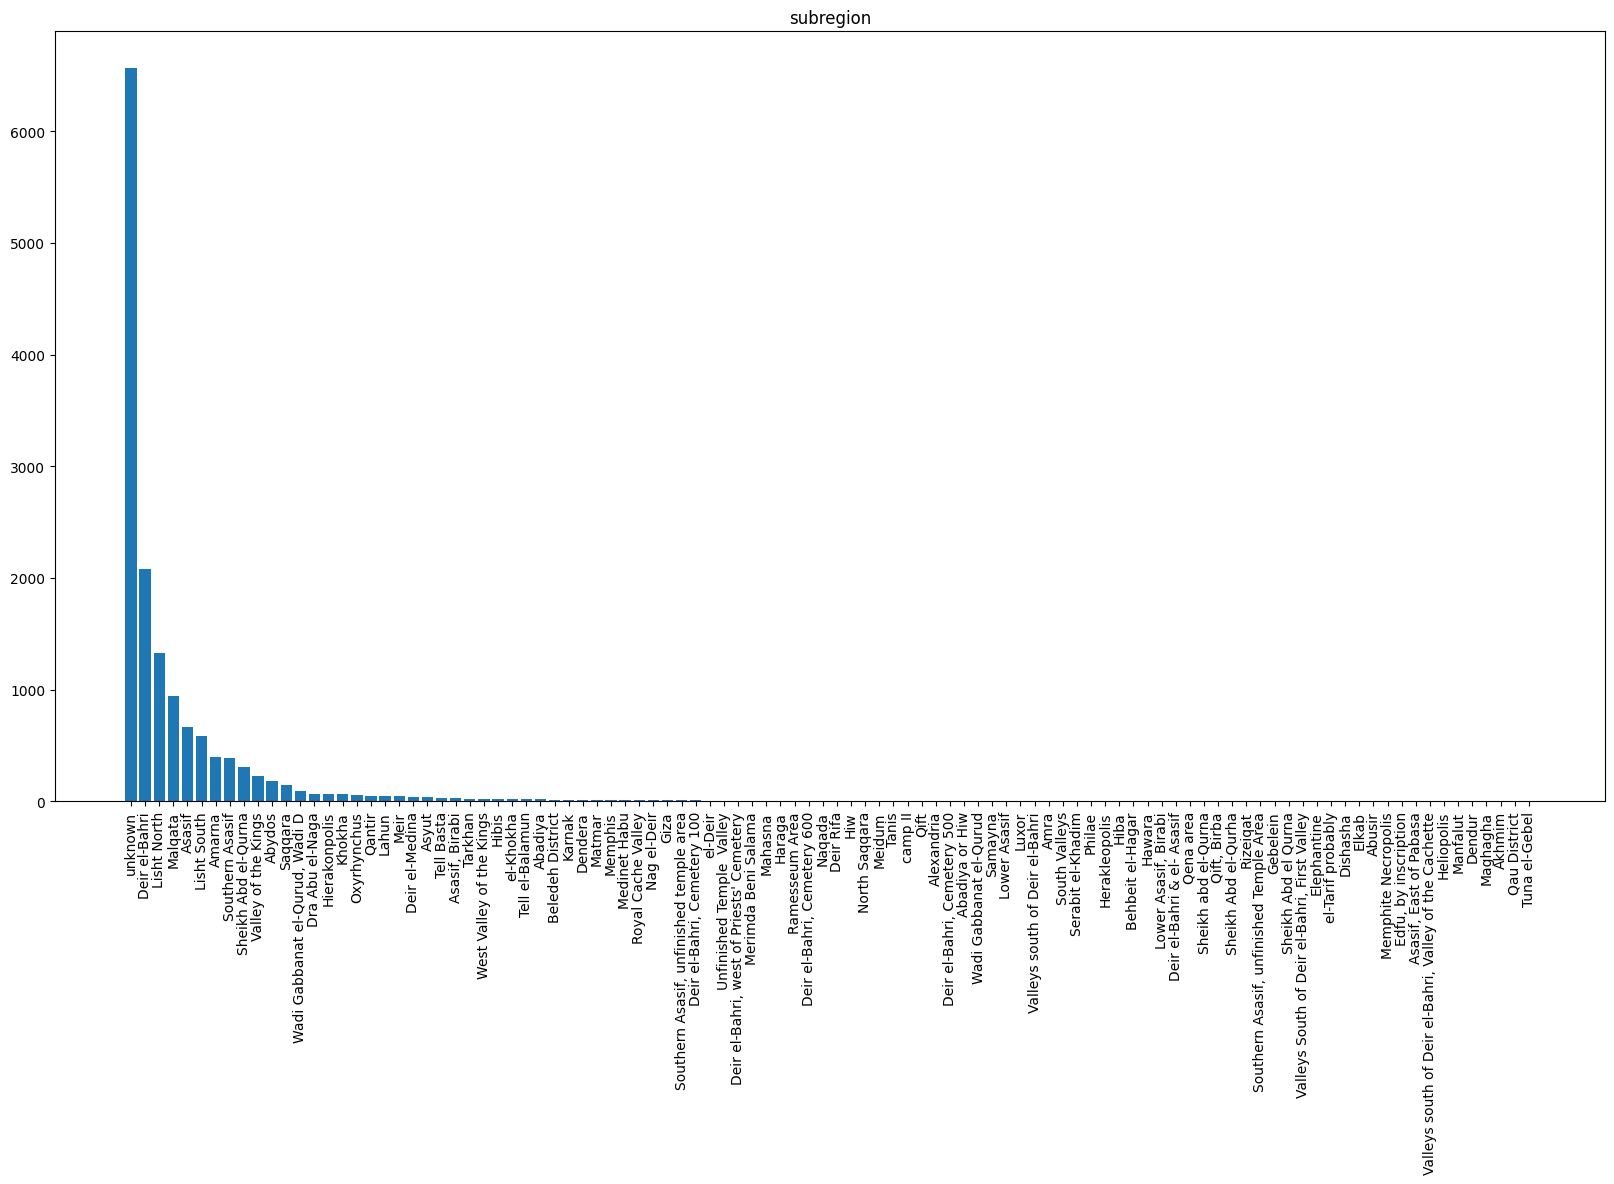

hi reign


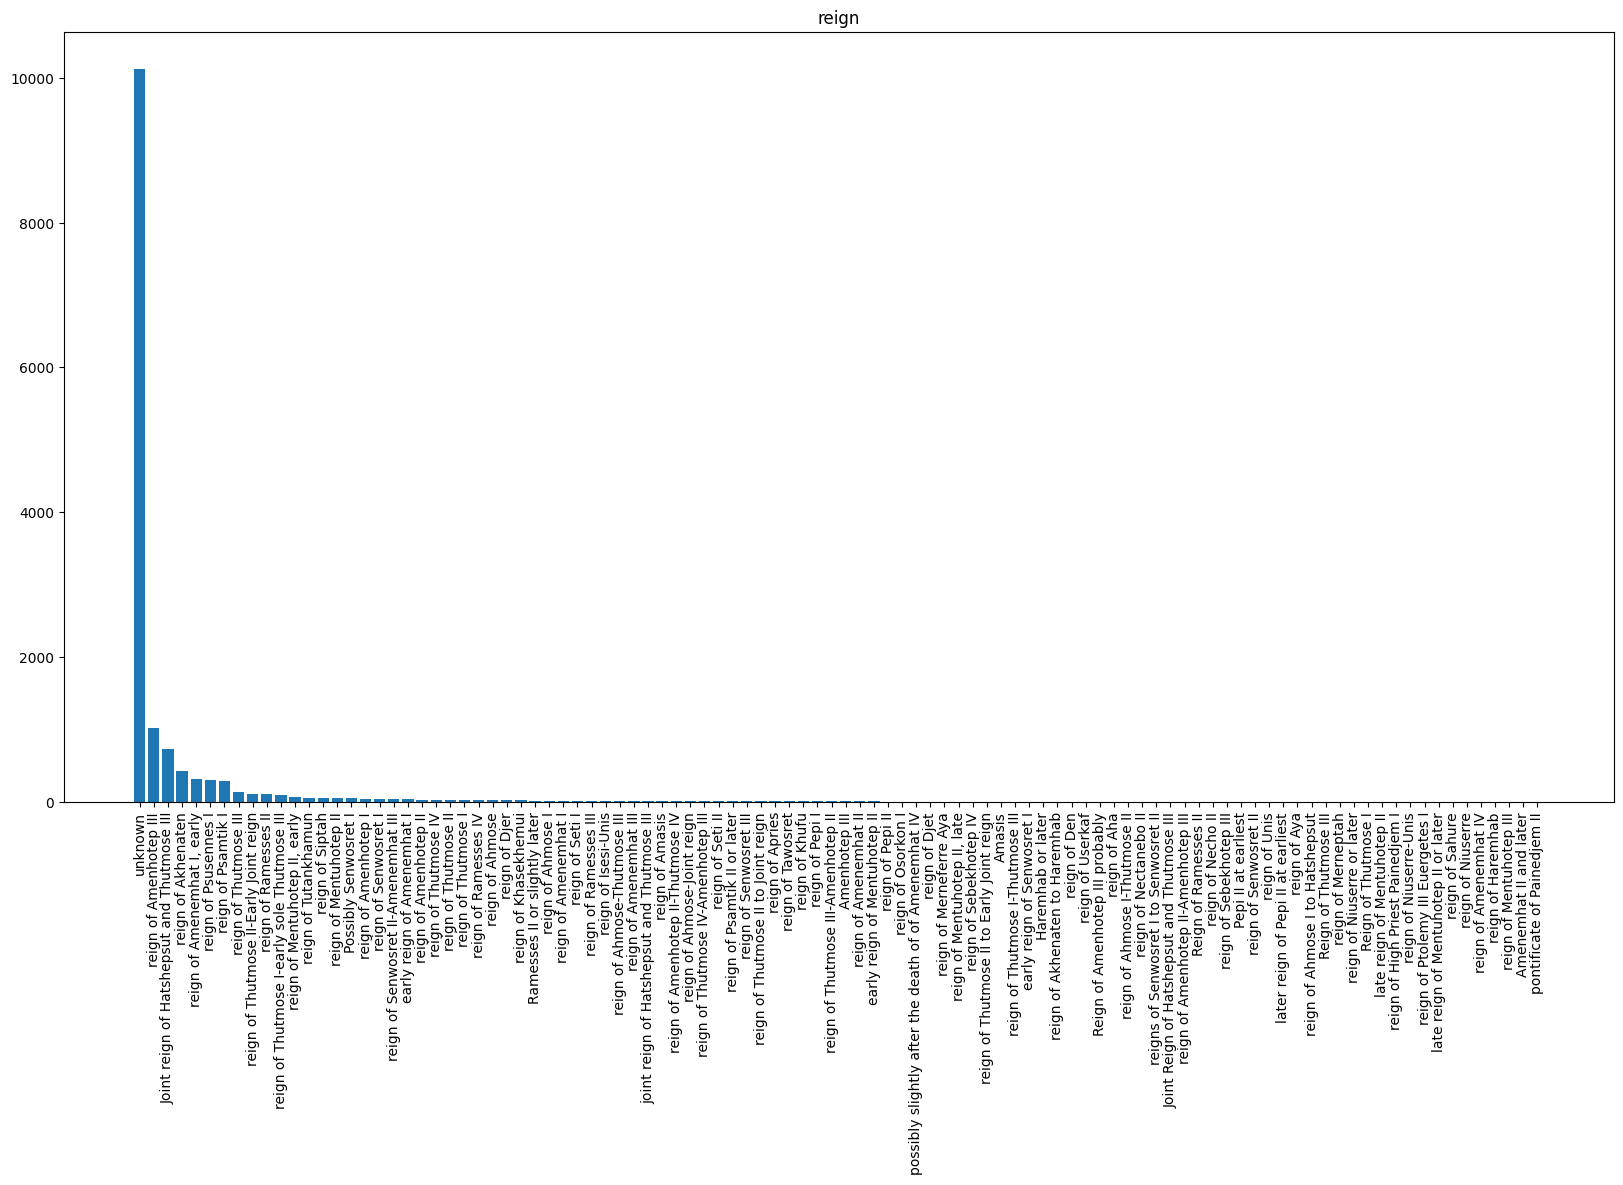

hi period


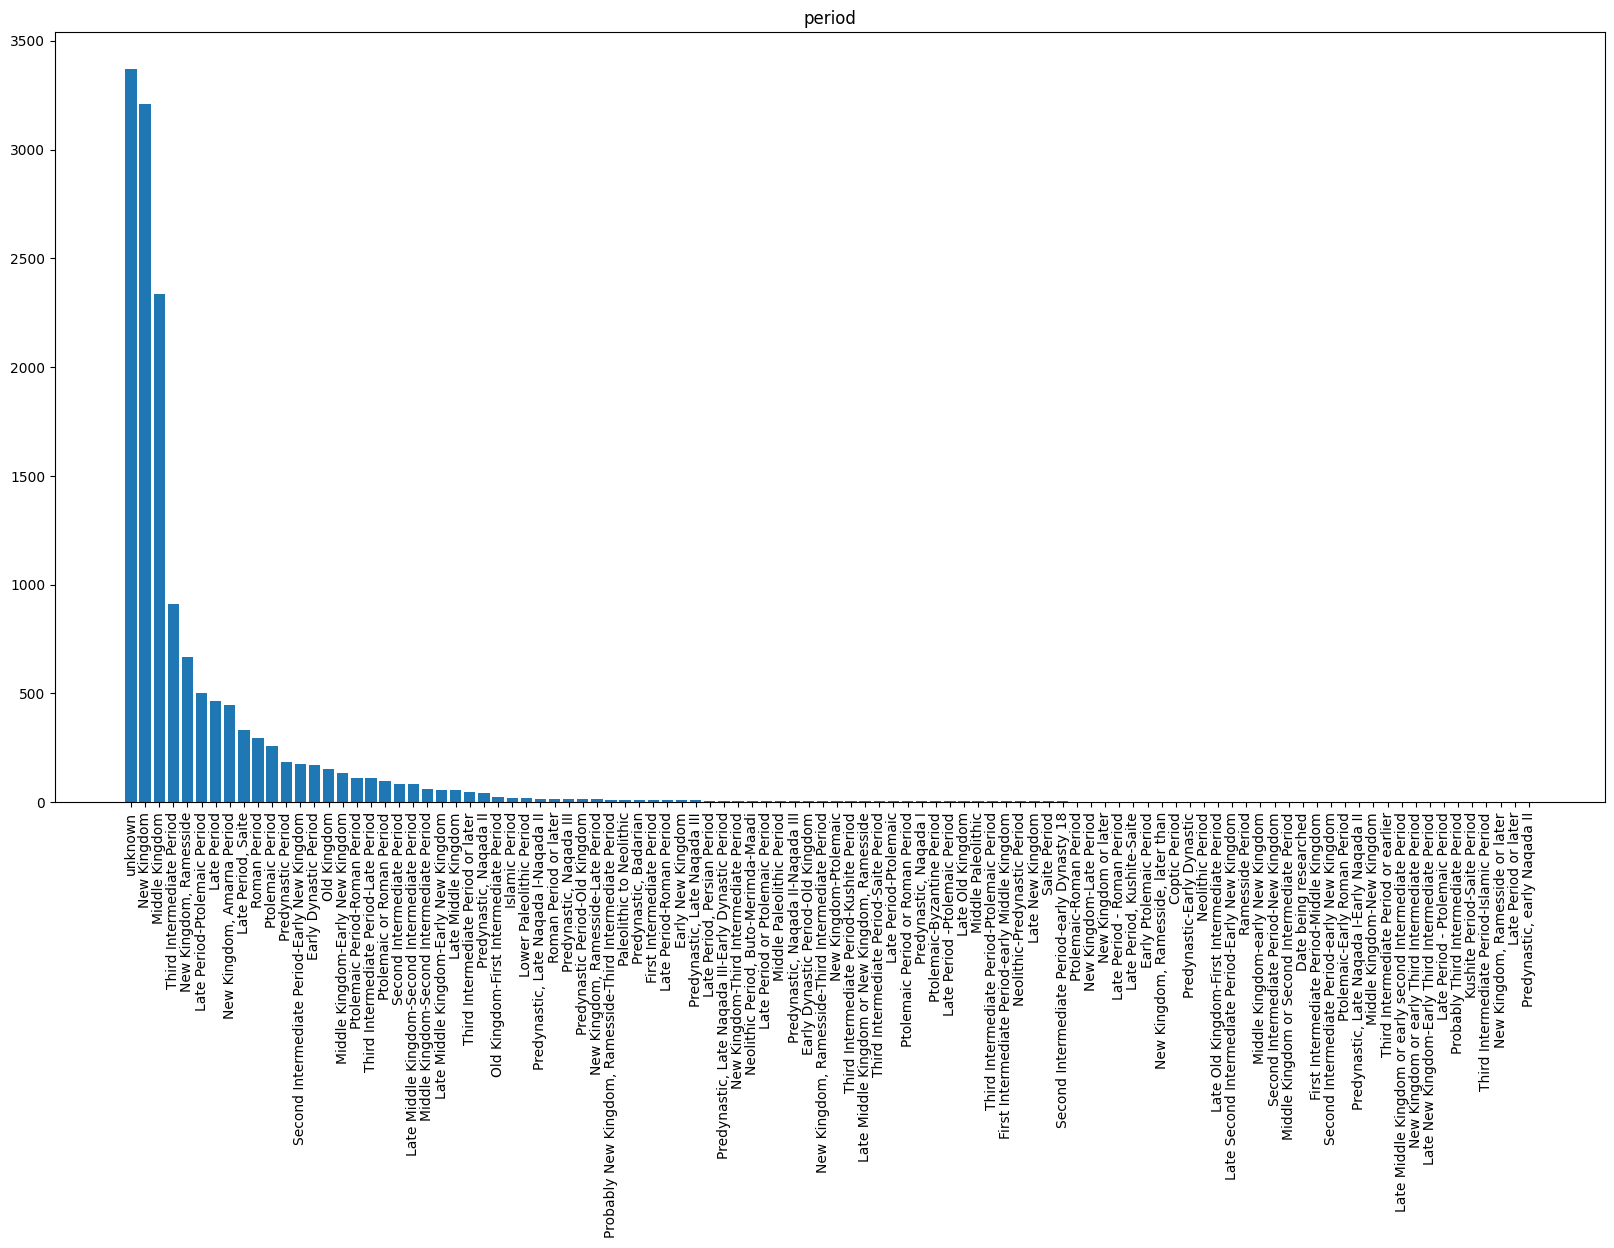

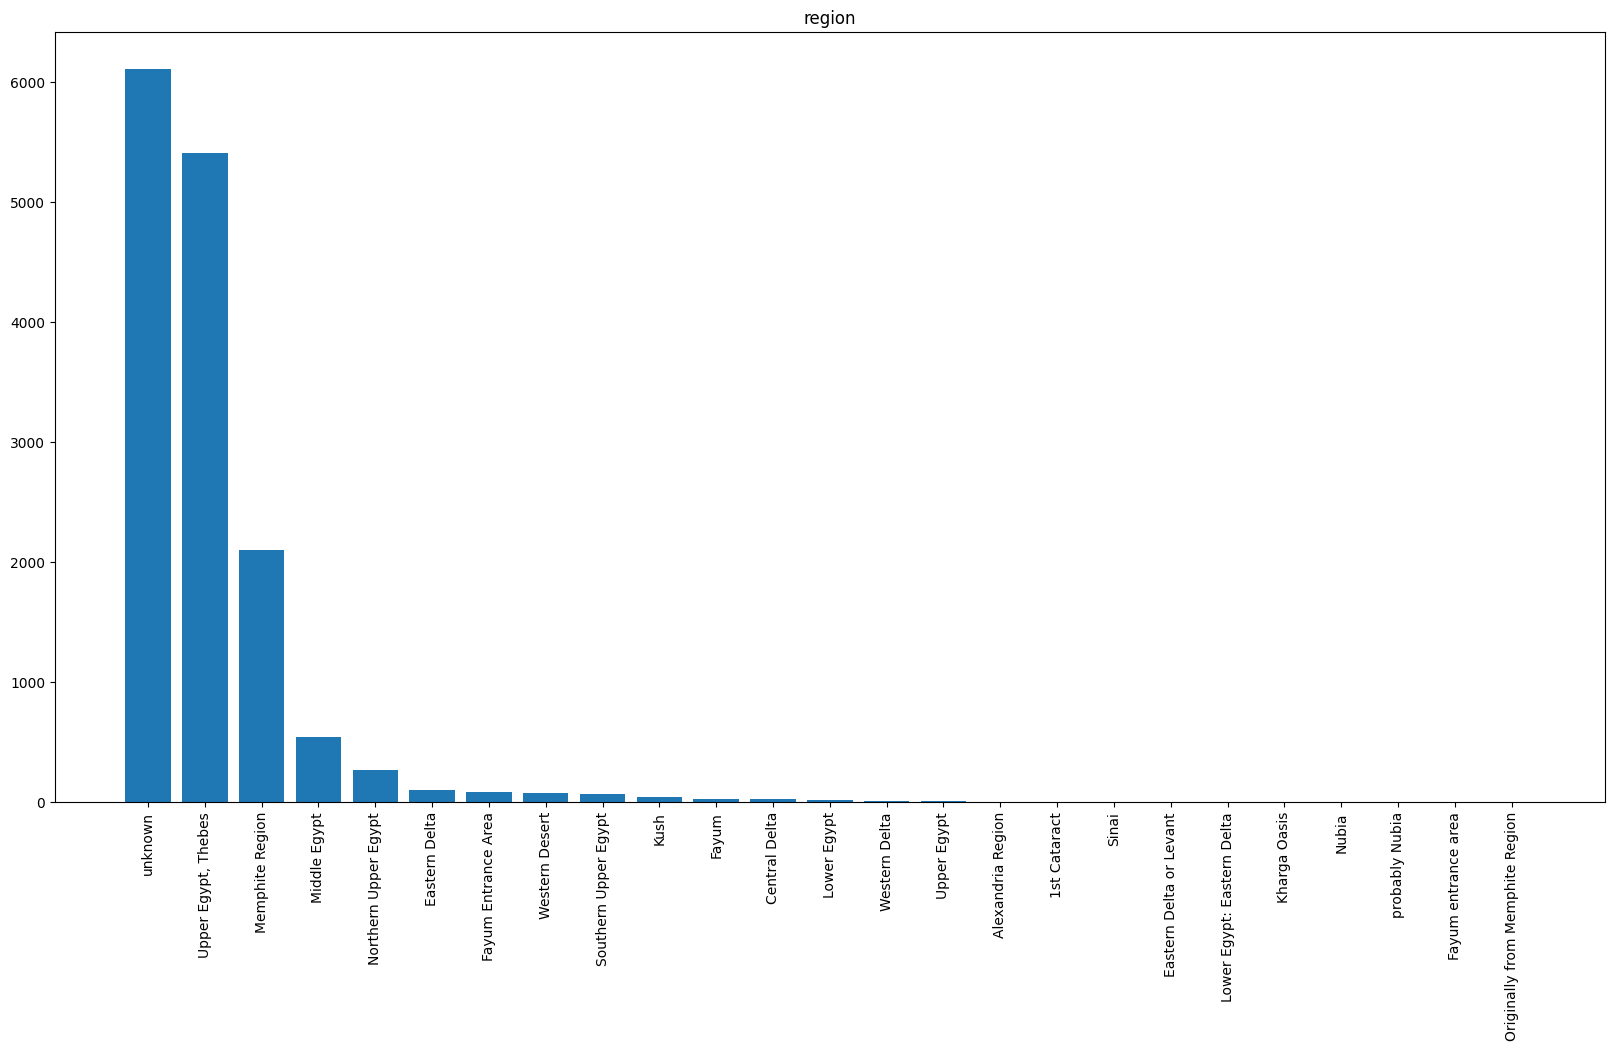

hi dynasty


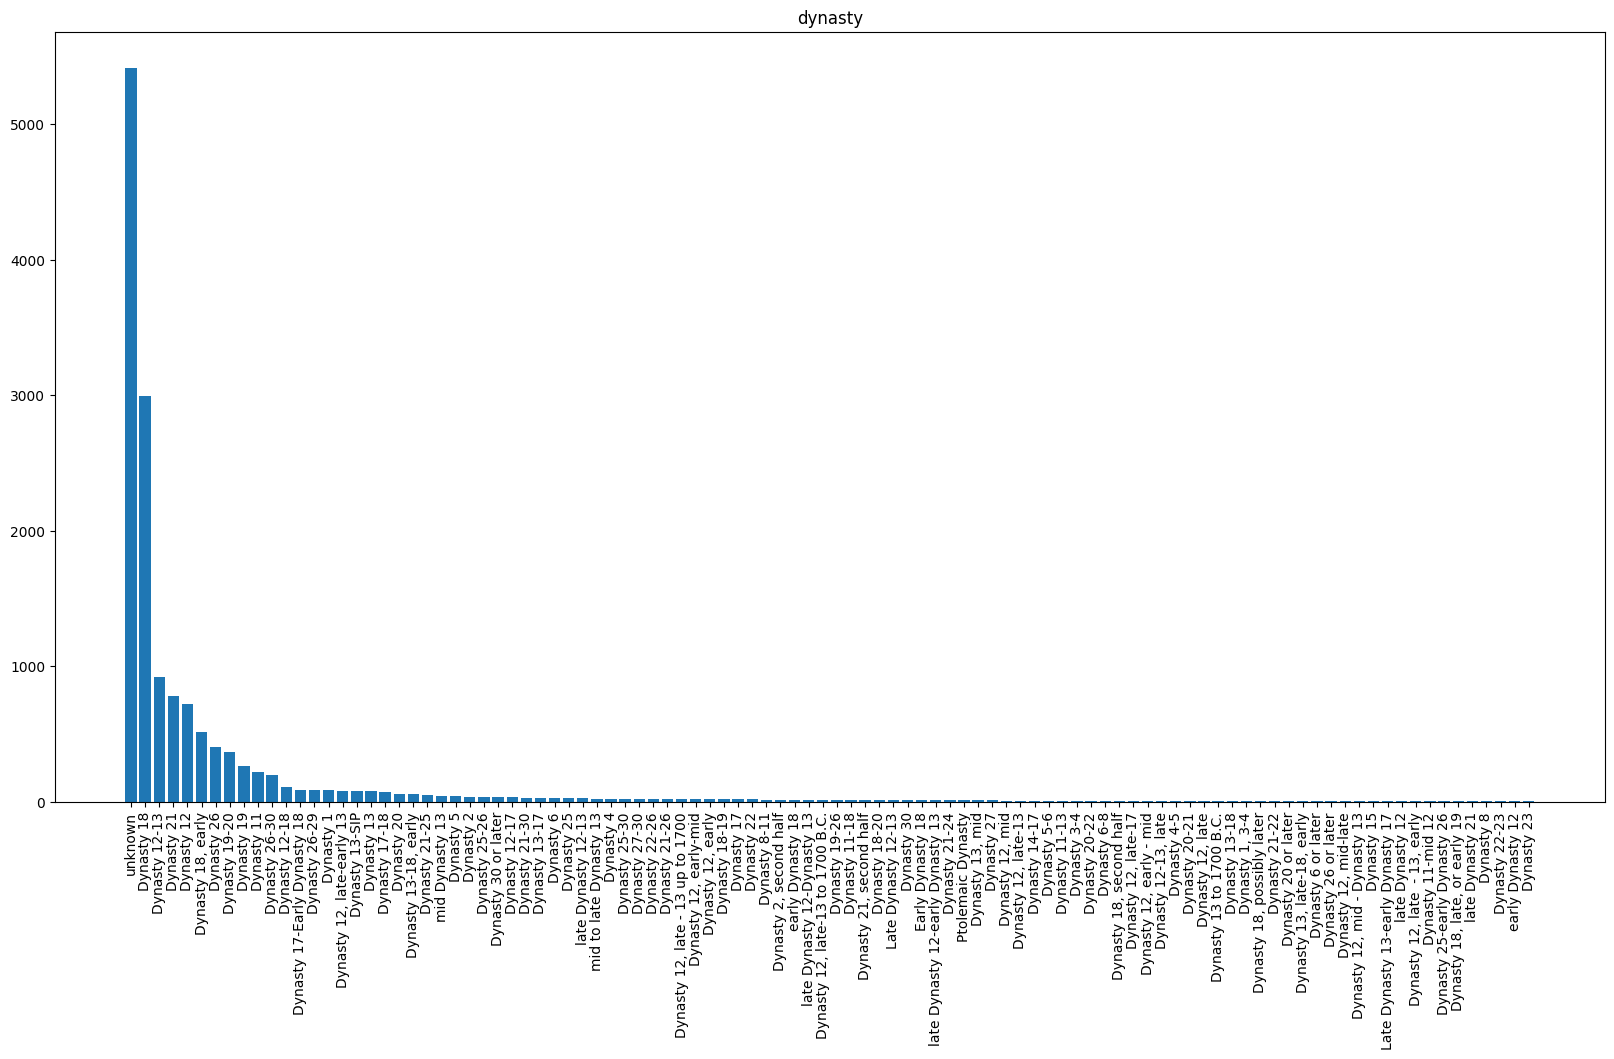

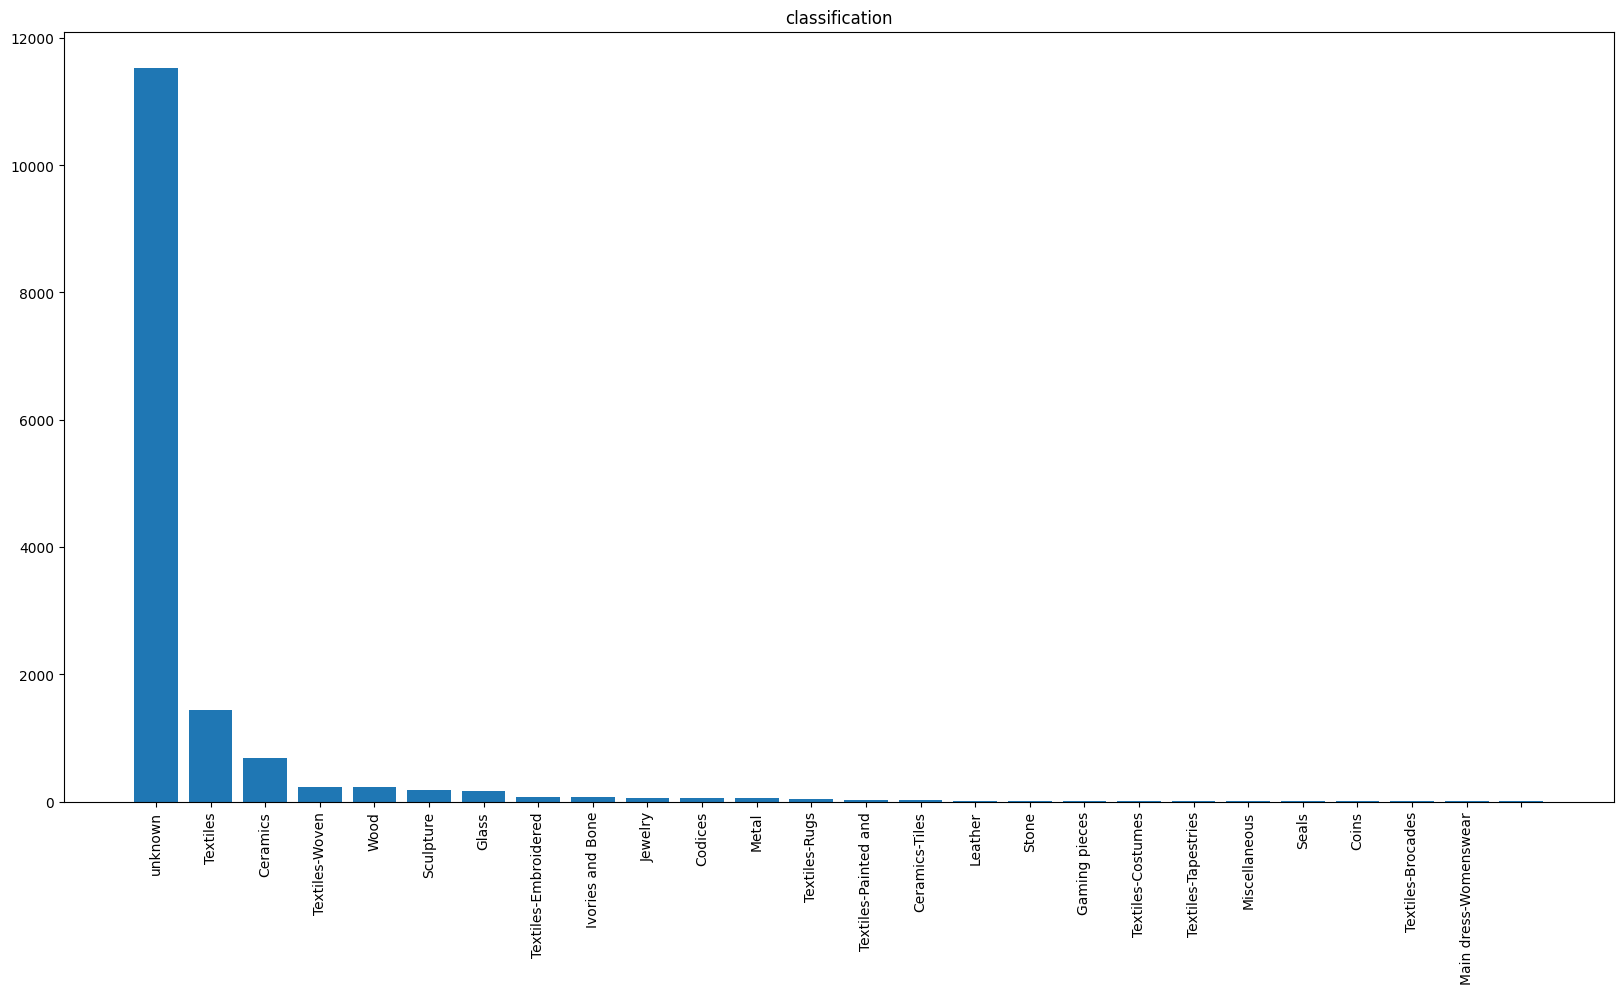

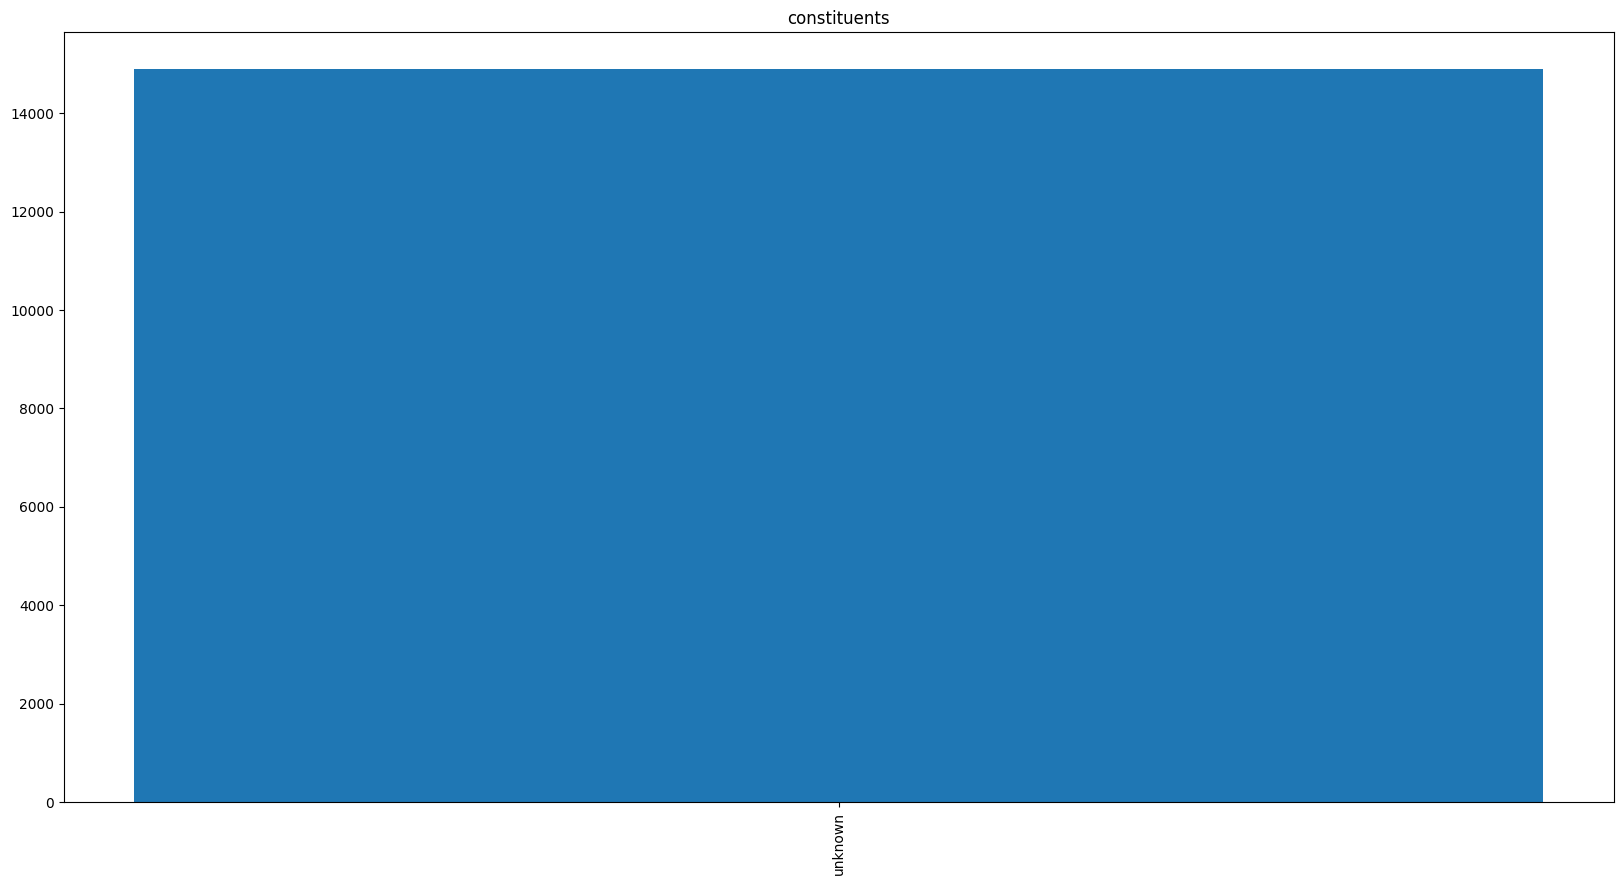

In [126]:
import matplotlib.pyplot as plt 
for i in list(df.columns):
    if len(df[i].value_counts()) <= 300:

        if len(df[i].value_counts()) >= 100:
            plt.figure(figsize=(20, 10))
            print("hi", i)
            plt.bar(df[i].value_counts().index[:100], df[i].value_counts()[:100])
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()
        else:
            plt.figure(figsize=(20, 10))
            plt.bar(df[i].value_counts().index, df[i].value_counts())
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()


In [127]:
df.to_csv("combined_Met.csv")
